In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = pd.read_csv("/kaggle/input/us-software-engineer-job/data.csv", encoding='latin-1')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58433 entries, 0 to 58432
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  58433 non-null  object 
 1   company                58430 non-null  object 
 2   salary                 18103 non-null  object 
 3   rating                 58433 non-null  float64
 4   review_count           58433 non-null  int64  
 5   types                  42577 non-null  object 
 6   location               58433 non-null  object 
 7   relative_time          58433 non-null  object 
 8   hires_needed           11857 non-null  object 
 9   hires_needed_exact     18439 non-null  object 
 10  urgently_hiring        58433 non-null  bool   
 11  remote_work_model      22804 non-null  object 
 12  snippet                58425 non-null  object 
 13  dradis_job             58433 non-null  bool   
 14  link                   58433 non-null  object 
 15  ne

missing value count:
title                        0
company                      3
salary                   40330
rating                       0
review_count                 0
types                    15856
location                     0
relative_time                0
hires_needed             46576
hires_needed_exact       39994
urgently_hiring              0
remote_work_model        35629
snippet                      8
dradis_job                   0
link                         0
new_job                      0
job_link                     0
sponsored                    0
featured_employer            0
indeed_applyable             0
ad_id                    34807
remote_location              0
source_id                    0
hiring_event_job             0
indeed_apply_enabled         0
job_location_postal      32312
company_overview_link    22138
activity_date            44632
location_extras          46983
dtype: int64


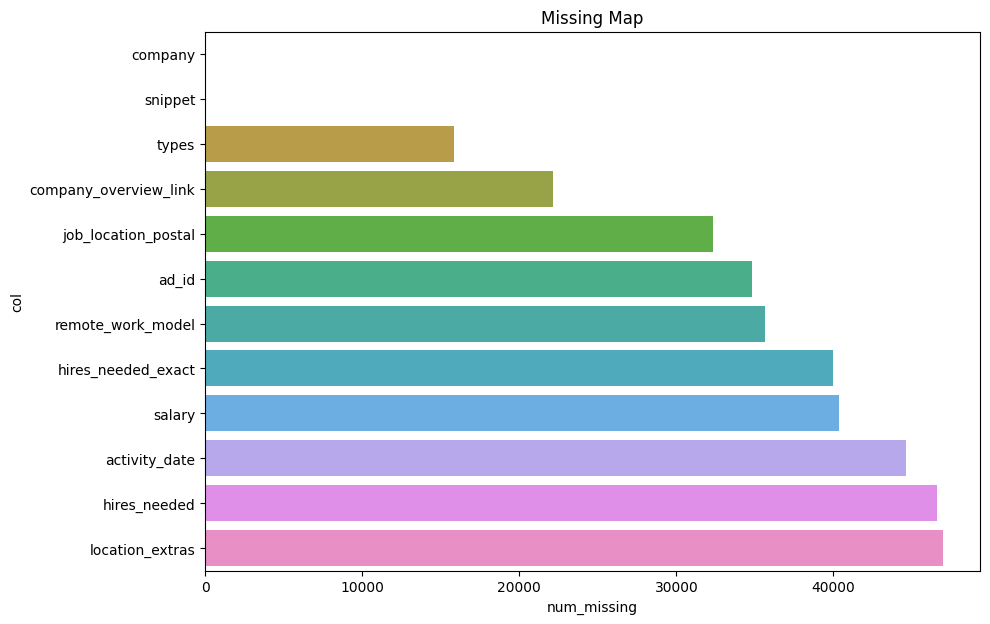

In [2]:
miss_cnt = df.isnull().sum()
print("missing value count:")
print(miss_cnt)
missing = miss_cnt[miss_cnt > 0]
if missing.empty:
    print("There are no missing values")
else:
    # print missing map
    missing.sort_values(inplace=True)
    missing_df = pd.DataFrame({'col': missing.index, 'num_missing': missing.values})

    plt.figure(figsize=(10,7))
    plt.title('Missing Map')
    sns.barplot(y='col', x='num_missing', data=missing_df)
    plt.show()

In [3]:
total_cnt = 0
drop_cnt = 0
drop_row = []
for index, row in df.iterrows(): 
    total_cnt += 1
    try:
        missing = (float(row[3])*float(row[4]) < 1e-6)
        if missing:
            drop_row.append(index)
    except:
        drop_cnt += 1
        continue
    drop_cnt += missing

print(len(drop_row))
print(f"Drop rows: {drop_cnt}\nTotal rows: {total_cnt}\nDrop ratio: {drop_cnt/total_cnt}")

18865
Drop rows: 18865
Total rows: 58433
Drop ratio: 0.3228483904642924


In [4]:
df = df.drop(drop_row)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 39568 entries, 2 to 58431
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  39568 non-null  object 
 1   company                39567 non-null  object 
 2   salary                 8229 non-null   object 
 3   rating                 39568 non-null  float64
 4   review_count           39568 non-null  int64  
 5   types                  25970 non-null  object 
 6   location               39568 non-null  object 
 7   relative_time          39568 non-null  object 
 8   hires_needed           4002 non-null   object 
 9   hires_needed_exact     5799 non-null   object 
 10  urgently_hiring        39568 non-null  bool   
 11  remote_work_model      13358 non-null  object 
 12  snippet                39560 non-null  object 
 13  dradis_job             39568 non-null  bool   
 14  link                   39568 non-null  object 
 15  new_job

company
Indeed                      1166
Capital One                 1063
Liberty Mutual Insurance     808
VMware                       629
VMware Engineering           491
                            ... 
Brownells Inc.                 1
Lime                           1
Hyro                           1
Haymarket Media Inc.           1
SIDEARM Sports                 1
Name: count, Length: 6293, dtype: int64


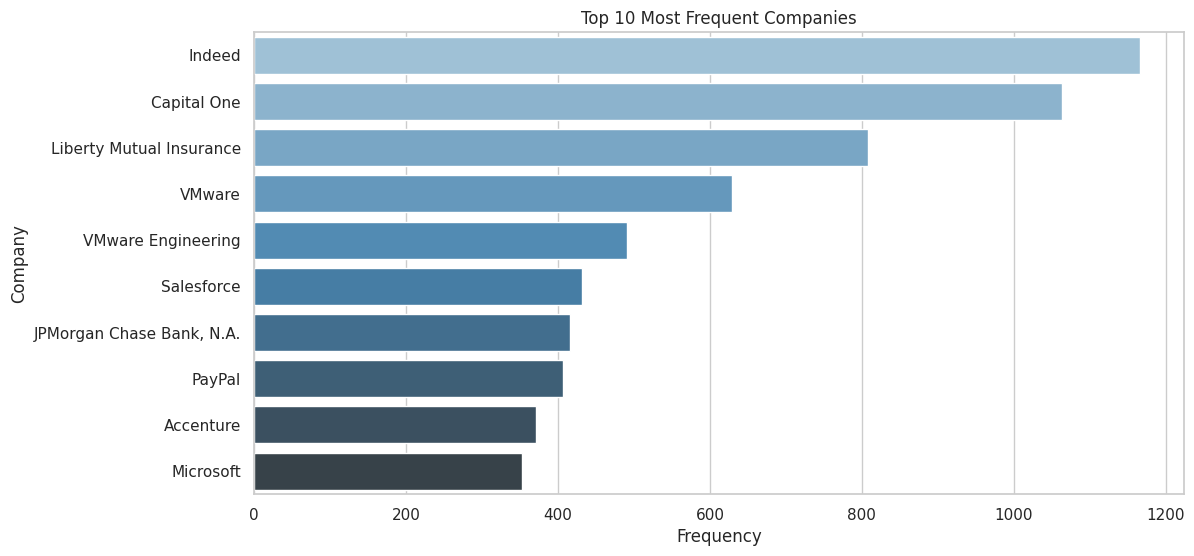

In [5]:
company_counts = df['company'].value_counts()
print(company_counts)
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Customize the appearance of the plot
sns.set(style="whitegrid")
sns.barplot(x=company_counts.values[:10], y=company_counts.index[:10], palette="Blues_d")

# Set labels and title
plt.xlabel("Frequency")
plt.ylabel("Company")
plt.title("Top 10 Most Frequent Companies")

# Show the plot
plt.show()


salary
$132,000 - $192,000 a year    505
$109,000 - $159,000 a year    322
$150,000 - $200,000 a year    129
$164,000 - $239,000 a year    109
$121,800 a year               109
                             ... 
$100,000 - $185,379 a year      1
$159,000 - $231,000 a year      1
$69,224 - $153,038 a year       1
$84,100 - $196,300 a year       1
$105,000 - $234,000 a year      1
Name: count, Length: 1232, dtype: int64


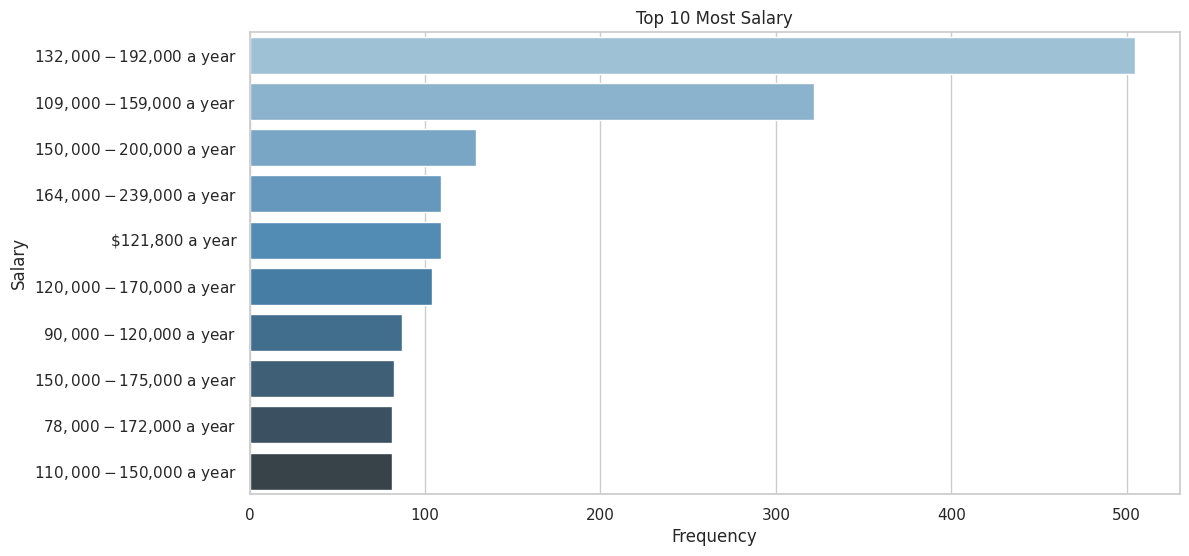

In [6]:
salary_count = df['salary'].value_counts()
print(salary_count)
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Customize the appearance of the plot
sns.set(style="whitegrid")
sns.barplot(x=salary_count.values[:10], y=salary_count.index[:10], palette="Blues_d")

# Set labels and title
plt.xlabel("Frequency")
plt.ylabel("Salary")
plt.title("Top 10 Most Salary")

# Show the plot
plt.show()


(1000, 2) (1000,)
Counter({0: 334, 1: 333, 2: 333})
[-3.05837272  4.48825769] 0
[-8.60973869 -3.72714879] 1
[1.37129721 5.23107449] 0
[-9.33917563 -2.9544469 ] 1
[-8.63895561 -8.05263469] 2
[-8.48974309 -9.05667083] 2
[-7.51235546 -7.96464519] 2
[-7.51320529 -7.46053919] 2
[-0.61947075  3.48804983] 0
[-10.91115591  -4.5772537 ] 1


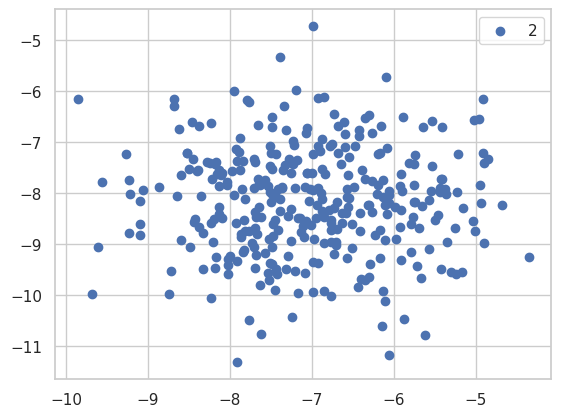

In [7]:
# example of multi-class classification task

from numpy import where

from collections import Counter

from sklearn.datasets import make_blobs

from matplotlib import pyplot

# define dataset

X, y = make_blobs(n_samples=1000, centers=3, random_state=1)

# summarize dataset shape

print(X.shape, y.shape)

# summarize observations by class label

counter = Counter(y)

print(counter)

# summarize first few examples

for i in range(10):

    print(X[i], y[i])

# plot the dataset and color the by class label

for label, _ in counter.items():

    row_ix = where(y == label)[0]

pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))

pyplot.legend()

pyplot.show()